In [1]:
library(caret)
library(dplyr)
options(warn = -1)
library(nnet)
library(e1071)
library(randomForest)
library(party)
# library(NbClust)
library(class)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [2]:
서울대전앞뒤2일 <- read.csv('../Data_Project/alldata.csv', fileEncoding = "utf-8")[,-c(5:9)]
서울대전앞뒤2일[,1] <- as.Date(서울대전앞뒤2일[,1])
head(서울대전앞뒤2일)


날짜,일차,출발시간,소요시간
2013-02-08,0,0,91
2013-02-09,1,0,132
2013-02-10,2,0,83
2013-02-11,3,0,87
2013-02-12,4,0,84
2013-02-08,0,1,88


In [3]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(서울대전앞뒤2일$소요시간, p=0.7, list=F)
  data.tr <- 서울대전앞뒤2일[samp,]
  data.test <- 서울대전앞뒤2일[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 81.84561

In [4]:
## 다 : 66.8
## 1:4 : 68.3

In [5]:
sd22 <- read.csv("../Data_Project/진짜최종.csv", fileEncoding = "UTF-8")

head(sd22)
nrow(sd22)

소요시간,일차,출발시간,연휴길이
91,0,0,3
88,0,1,3
88,0,2,3
87,0,3,3
91,0,4,3
97,0,5,3


[1] 1008

In [6]:
sum <- 0

for (i in 1:100){
  samp <- createDataPartition(sd22$소요시간, p=0.7, list=F)
  data.tr <- sd22[samp,]
  data.test <- sd22[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간

  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.80< y) & (pred_rf*1.2 > y)) 
  sum <- sum + 예측력_rf
}

sum

[1] 83.91667

In [7]:
sdTime <- aggregate(소요시간 ~ 출발시간, sd22, mean)
sdTime

출발시간,소요시간
0,94.14286
1,93.76190
2,94.45238
3,95.54762
4,94.47619
5,95.47619
6,96.69048
7,98.02381
8,97.64286
9,99.69048


In [8]:
table(sd22$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 

In [9]:
sd222 <- read.csv("../Data_Project/진짜최종_날짜포함.csv", fileEncoding = "utf-8")

In [10]:
head(sd222)

소요시간,일차,출발시간,연휴길이,날짜
91,0,0,2013,2013-02-08
88,1,0,2013,2013-02-08
88,2,0,2013,2013-02-08
87,3,0,2013,2013-02-08
91,4,0,2013,2013-02-08
97,5,0,2013,2013-02-08


In [11]:
popCar <- read.csv("../Data_Project/인구수자동차수.csv", fileEncoding = "utf-8")
popCar

X,년도,서울인구수,승용차,승합차,차합계
1,2013,10388055,2462515,156871,2619386
6,2014,10369593,2510742,149991,2660733
11,2015,10297138,2560154,141927,2702081
16,2016,10204057,2598344,134309,2732653
21,2017,10124579,2641190,127564,2768754
26,2018,10049607,2658637,120780,2779417
31,2019,10010983,2670803,114310,2785113
37,2020,9911088,2711984,106504,2818488


In [12]:
nrow(sd222)

[1] 1056

In [13]:
table(sd222$일차)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 

In [14]:
table(sd222$출발시간)


  0   1   2   3   4   5   6 
192 192 192 192 192  72  24 

In [15]:
sd555 <- read.csv("../Data_Project/AI프로젝트22.csv", fileEncoding = 'utf-8')

In [16]:
sd555 <- sd555[,-5]
sd12 <- sd555[,6:8]
head(sd12)
sd12 <- scale(sd12)
head(sd12)

X1종.교통량,X2종.교통량,서울인구수
3793419,229419,10388055
2514790,203047,10388055
1846564,235137,10388055
1632415,305994,10388055
2247045,444384,10388055
5186824,774325,10388055


X1종.교통량,X2종.교통량,서울인구수
-0.7736980,-0.7304996,1.406826
-0.8754301,-0.7805927,1.406826
-0.9285965,-0.7196384,1.406826
-0.9456349,-0.5850469,1.406826
-0.8967328,-0.3221779,1.406826
-0.6628339,0.3045384,1.406826


In [17]:
sdScale <- cbind(sd555[,1:5], sd12)

In [18]:
nrow(sd555)
head(sd555)
head(sdScale)

[1] 1008

소요시간,출발시간,일차,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
91,0,0,3,TRUE,3793419,229419,10388055
88,1,0,3,TRUE,2514790,203047,10388055
88,2,0,3,TRUE,1846564,235137,10388055
87,3,0,3,TRUE,1632415,305994,10388055
91,4,0,3,TRUE,2247045,444384,10388055
97,5,0,3,TRUE,5186824,774325,10388055


소요시간,출발시간,일차,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
91,0,0,3,TRUE,-0.7736980,-0.7304996,1.406826
88,1,0,3,TRUE,-0.8754301,-0.7805927,1.406826
88,2,0,3,TRUE,-0.9285965,-0.7196384,1.406826
87,3,0,3,TRUE,-0.9456349,-0.5850469,1.406826
91,4,0,3,TRUE,-0.8967328,-0.3221779,1.406826
97,5,0,3,TRUE,-0.6628339,0.3045384,1.406826


In [19]:
sum_rf <- 0
# sum_nnet <- 0
sum_ctree <- 0
# sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0

for (i in 1:100){
  samp <- createDataPartition(sdScale$소요시간, p=0.7, list=F)
  data.tr <- sdScale[samp,]
  data.test <- sdScale[-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간)
  y_tr <- data.tr$소요시간
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간)
  y_test <- data.test$소요시간
    
  # RF
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean((pred_rf*0.85 < y_test) & (pred_rf*1.15 > y_test)) 
  # RF train
  model_rf_tr <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean((pred_rf_tr*0.85 < y_tr) & (pred_rf_tr*1.15 > y_tr))

  
  # 인공신경망
  # model_nnet <- nnet(소요시간 ~ ., data=data.tr, size=3)
  # pred_nnet <- predict(model_nnet, x, type="class")
  # 예측력_nnet <- mean((pred_nnet*0.85 < y) & (pred_nnet*1.15 > y)) 
 
  # 의사결정나무
  model_ctree <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean((pred_ctree*0.85 < y_test) & (pred_ctree*1.15 > y_test))
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean((pred_ctree_tr*0.85 < y_tr) & (pred_ctree_tr*1.15 > y_tr))
    
  # SVM test
  model_svm <- svm(소요시간 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean((pred_svm*0.85 < y_test) & (pred_svm*1.15 > y_test))
  # SVM train
   model_svm_tr <- svm(소요시간 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean((pred_svm_tr*0.85 < y_tr) & (pred_svm_tr*1.15 > y_tr))
    
  # 다항 로지스틱 회귀분석
  # model_multinom <- multinom(소요시간 ~ ., data=data.tr)
  # pred_multinom <- predict(model_multinom, x, type="class")
  # 예측력_multinom <- mean((pred_multinom*0.85 < y) & (pred_multinom*1.15 > y)) 
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  # sum_multi <- sum_multi + 예측력_multinom
  # sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
}

sum_rf
sum_ctree
sum_svm
# sum_multi
# sum_ctree

sum_rf_tr
sum_ctree_tr
sum_svm_tr

[1] 75.15667

[1] 61.98

[1] 75.29333

[1] 90.15537

[1] 64.27119

[1] 77.47881

In [20]:
nrow(sd555)

[1] 1008

In [21]:
# 정확도
r <- 0

# for (i in 1:100){
samp <- createDataPartition(sdScale$소요시간, p=0.7, list=F)
  data.tr <- sdScale[samp,]
  data.test <- sdScale[-samp,]

  x <- subset(data.test, select = -소요시간)
  y <- data.test$소요시간
    
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x)
  예측력_rf <- mean((pred_rf*0.85 < y) & (pred_rf*1.15 > y)) 
  r <- 1 - sum((y - pred_rf)^2) / sum((y - mean(y))^2)
    
# }   
r

[1] 0.625494

In [22]:
library(Metrics)


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall



In [23]:
kmeans(sdScale$출발시간, 3)

K-means clustering with 3 clusters of sizes 336, 294, 378

Cluster means:
  [,1]
1 12.5
2 20.0
3  4.0

Clustering vector:
   [1] 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1
  [38] 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3
  [75] 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1
 [112] 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3
 [149] 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 [186] 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3
 [223] 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2
 [260] 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 [297] 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2
 [334] 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1
 [371] 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1

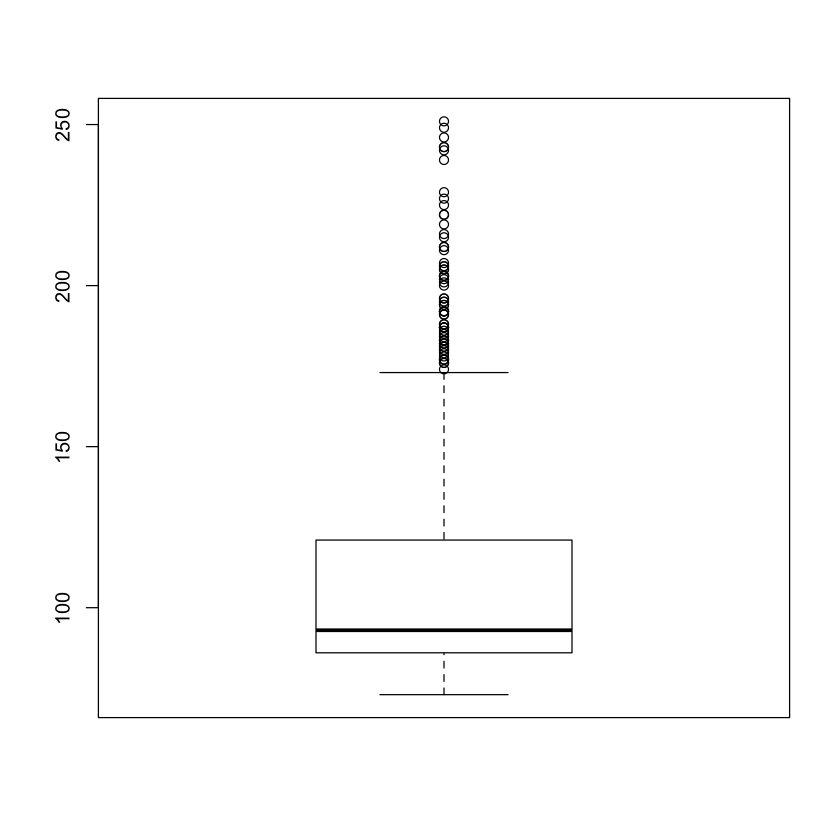

In [24]:
boxplot(sdScale$소요시간)

In [25]:
table(sdScale$일차)


  0   1   2   3   4   5 
192 192 192 192 168  72 

In [26]:
# 일차별 데이터셋 분류
sd1 <- subset(sdScale, 일차 == 0)
sd2 <- subset(sdScale, 일차 == 1)
sd3 <- subset(sdScale, 일차 == 2)
sd4 <- subset(sdScale, 일차 == 3)
sd5 <- subset(sdScale, 일차 == 4)
sd6 <- subset(sdScale, 일차 == 5)

In [27]:
kmeans(sd1$소요시간, 3)

K-means clustering with 3 clusters of sizes 114, 34, 44

Cluster means:
       [,1]
1  89.23684
2 197.00000
3 129.86364

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 3 3 3 3 3 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 2 2 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
[112] 3 3 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 2 3 2 2 2 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3
[186] 3 3 3 2 2 2 2

Within cluster sum of squares by cluster:
[1]  5568.605 21062.000 10031.182
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [28]:
kmeans(sd2$소요시간, 3)

K-means clustering with 3 clusters of sizes 74, 30, 88

Cluster means:
      [,1]
1 151.1351
2 200.4333
3 105.4432

Clustering vector:
  [1] 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 2 2 2 2
 [38] 2 2 2 1 1 1 1 3 3 3 3 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 1 1 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 3 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1
[186] 1 1 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 11964.65 11557.37 14647.72
 (between_SS / total_SS =  85.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [29]:
kmeans(sd3$소요시간, 3)

K-means clustering with 3 clusters of sizes 98, 37, 57

Cluster means:
       [,1]
1  90.65306
2 155.94595
3 116.54386

Clustering vector:
  [1] 1 1 1 1 1 3 1 1 1 1 1 1 1 3 3 3 3 2 2 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 3 3 3 2 3 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 2 2 2 2 2 2 2 2 2 1 1
 [75] 1 1 1 1 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
[112] 2 2 2 2 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 2 2 2 2 3 3 3 1 1 1 1 1
[149] 1 1 1 3 1 1 3 3 3 3 3 2 3 2 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 2
[186] 2 2 2 3 3 3 1

Within cluster sum of squares by cluster:
[1]  4174.204 10125.892  5112.140
 (between_SS / total_SS =  85.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [30]:
kmeans(sd4$소요시간, 3)

K-means clustering with 3 clusters of sizes 146, 38, 8

Cluster means:
       [,1]
1  87.05479
2 104.63158
3 168.50000

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 3 3 3 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
[186] 2 2 2 1 1 1 1

Within cluster sum of squares by cluster:
[1] 2967.562 3334.842 3400.000
 (between_SS / total_SS =  85.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [31]:
kmeans(sd5$소요시간, 3)

K-means clustering with 3 clusters of sizes 79, 10, 79

Cluster means:
       [,1]
1  91.46835
2 124.90000
3  82.46835

Clustering vector:
  [1] 3 3 3 3 3 1 3 3 3 3 3 3 1 1 1 1 1 1 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 3 3 1
 [75] 1 1 1 1 1 3 3 1 3 1 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 3 3 1 3
[149] 3 3 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 1055.6709 1208.9000  469.6709
 (between_SS / total_SS =  86.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [32]:
kmeans(sd6$소요시간, 3)

K-means clustering with 3 clusters of sizes 25, 34, 13

Cluster means:
      [,1]
1 79.20000
2 85.61765
3 93.15385

Clustering vector:
 [1] 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 3 3 3 1 1 1 1 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 1 1 1 1 3 1 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 3 2

Within cluster sum of squares by cluster:
[1] 150.00000  94.02941  73.69231
 (between_SS / total_SS =  84.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [33]:
# 출발시간별 데이터셋 분류
sd <- subset(sdScale, 출발시간 == 0)

In [34]:
kmeans(subset(sdScale, 출발시간 == 0)$소요시간, 3)

K-means clustering with 3 clusters of sizes 1, 36, 5

Cluster means:
       [,1]
1 219.00000
2  84.72222
3 137.00000

Clustering vector:
 [1] 2 3 2 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
[39] 3 2 2 2

Within cluster sum of squares by cluster:
[1]    0.000 1105.222 1090.000
 (between_SS / total_SS =  92.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [35]:
table(sdScale$소요시간)


 73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93 
  1   4   3   4   8  19  23  29  32  29  42  38  34  48  32  41  31  31  29  38 
 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 
 26  17  12  14   9  13   8   7  15   8  11   7   6   8   7   3   6   9  10   6 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 
  6   4   4   5   9   4   2   7   3   5   6   5   2   7   4   6   1   4   2   9 
134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 
  3   2   2   2   2   7   1   4   4   4   8   4   4   4   5   5   5   1   3   3 
154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 
  3   4   5   3   4   1   5   1   3   2   2   3   3   3   3   1   3   2   2   1 
174 176 177 178 179 180 181 182 183 184 185 186 187 188 191 192 194 195 196 200 
  1   2   3   1   1   2   2   2   3   1   2   1   4   2   2   4   2   2   2   1 
201 202 203 205 206 207 211

In [36]:
library(dplyr)
sdScaleArr <- arrange(sdScale, 소요시간)

In [37]:
nrow(sdScaleArr[sdScaleArr$소요시간 <= 84,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 84 & sdScaleArr$소요시간 <= 89,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 89 & sdScaleArr$소요시간 <= 113,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 114 & sdScaleArr$소요시간 <= 173,])
nrow(sdScaleArr[sdScaleArr$소요시간 > 173,])


[1] 194

[1] 193

[1] 331

[1] 216

[1] 68

In [38]:
sd일차 <- read.csv("../Data_Project/일단최종6월13일.csv")
head(sd일차)
nrow(sd일차)

소요시간,출발시간,일차,연휴길이,날짜,눈비,X1종.교통량,X2종.교통량,서울인구수,디데이
91,0,0,3,2013-02-08,TRUE,3793419,229419,10388055,전전날
88,1,0,3,2013-02-08,TRUE,2514790,203047,10388055,전전날
88,2,0,3,2013-02-08,TRUE,1846564,235137,10388055,전전날
87,3,0,3,2013-02-08,TRUE,1632415,305994,10388055,전전날
91,4,0,3,2013-02-08,TRUE,2247045,444384,10388055,전전날
97,5,0,3,2013-02-08,TRUE,5186824,774325,10388055,전전날


[1] 432

In [39]:
sd일차0 <- subset(sd일차, 일차 == 0)
nrow(sd일차0)
sd일차1 <- subset(sd일차, 일차 == 1)
nrow(sd일차1)
sd일차2 <- subset(sd일차, 일차 == 2)
nrow(sd일차2)

[1] 144

[1] 144

[1] 144

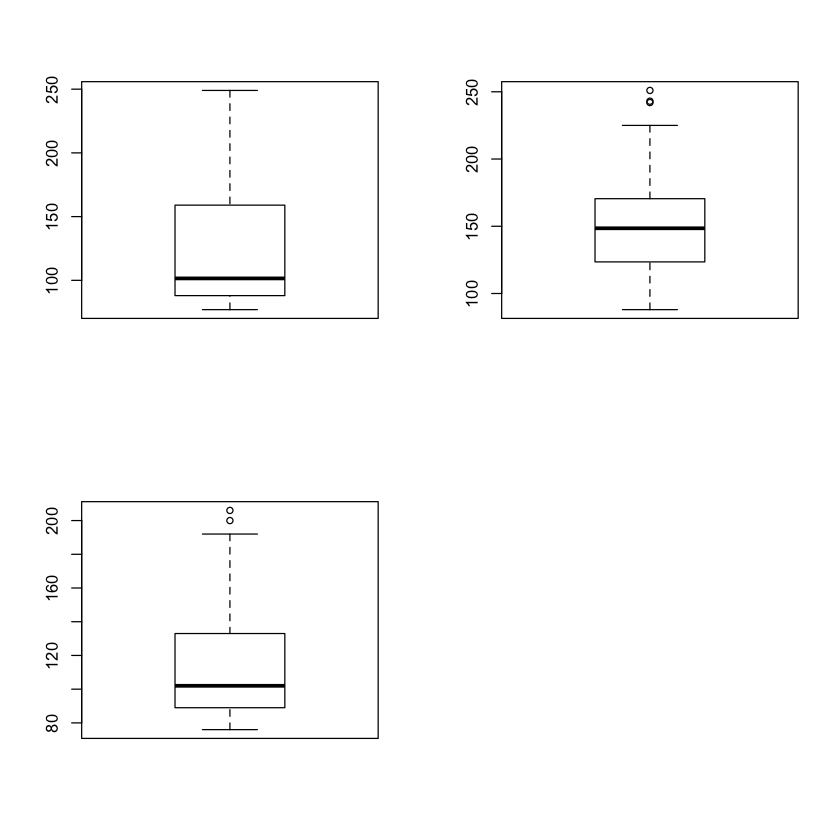

In [40]:
par(mfrow = c(2,2))
boxplot(sd일차0$소요시간)
boxplot(sd일차1$소요시간)
boxplot(sd일차2$소요시간)

In [41]:
# 

sdd2 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd1 <- read.csv("../Data_Project/AI프로젝트 - D-1.csv")

table(sdd2$소요시간범위)
table(sdd1$소요시간범위)

sdd2Scale <- sdd2[,6:8]

sdd2Scale <- scale(sdd2Scale)
head(sdd2Scale)

sdd2 <- sdd2[,-c(4,9)]
sdd1 <- sdd1[,-c(4,9)]
head(sdd2)
head(sdd1)
sdd2Scale <- cbind(sdd2[,1:4], sdd2Scale)
head(sdd2Scale)
head(sdd1[,c(1:6)])


 A  B  C  D 
35 37 36 36 


 A  B  C  D 
37 38 31 38 

X1종.교통량,X2종.교통량,서울인구수
-0.8192102,-0.86871839,1.124724
-0.9097371,-0.91451260,1.124724
-0.9570474,-0.85878925,1.124724
-0.9722092,-0.73574812,1.124724
-0.9286934,-0.49543791,1.124724
-0.7205572,0.07749504,1.124724


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,3793419,229419,10388055
B,1,3,TRUE,2514790,203047,10388055
B,2,3,TRUE,1846564,235137,10388055
A,3,3,TRUE,1632415,305994,10388055
B,4,3,TRUE,2247045,444384,10388055
B,5,3,TRUE,5186824,774325,10388055


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,3793419,229419,10388055
B,1,3,TRUE,2514790,203047,10388055
A,2,3,TRUE,1846564,235137,10388055
A,3,3,TRUE,1632415,305994,10388055
A,4,3,TRUE,2247045,444384,10388055
A,5,3,TRUE,5186824,774325,10388055


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수
B,0,3,TRUE,-0.8192102,-0.86871839,1.124724
B,1,3,TRUE,-0.9097371,-0.91451260,1.124724
B,2,3,TRUE,-0.9570474,-0.85878925,1.124724
A,3,3,TRUE,-0.9722092,-0.73574812,1.124724
B,4,3,TRUE,-0.9286934,-0.49543791,1.124724
B,5,3,TRUE,-0.7205572,0.07749504,1.124724


소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량
B,0,3,TRUE,3793419,229419
B,1,3,TRUE,2514790,203047
A,2,3,TRUE,1846564,235137
A,3,3,TRUE,1632415,305994
A,4,3,TRUE,2247045,444384
A,5,3,TRUE,5186824,774325


In [42]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

  samp <- createDataPartition(sdd2[,c(1:4,6)]$소요시간범위, p=0.7, list=F)
  data.tr <- sdd2[,c(1:4,6)][samp,]
  data.test <- sdd2[,c(1:4,6)][-samp,]
    
  # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위

for (i in 1:5){
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf/5, "\n")
cat("의사결정나무 : ", sum_ctree/5, "\n")
cat("SVM :  ", sum_svm/5, "\n")
cat("다항 로지스틱 :  ", sum_multi/5, "\n")
cat("인공신경망 :  ", sum_nnet/5, "\n")
# sum_ctree
cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr/5, "\n")
cat("의사결정나무 : ", sum_ctree_tr/5, "\n")
cat("SVM :  ", sum_svm_tr/5, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr/5, "\n")
cat("인공신경망 :  ", sum_nnet_tr/5, "\n")

Test Data 
랜덤 포레스트 :  0.8243902 
의사결정나무 :  0.6585366 
SVM :   0.8536585 
다항 로지스틱 :   0.804878 
인공신경망 :   0.6585366 
------------------------ 
Training Data 
랜덤 포레스트 :  1 
의사결정나무 :  0.7378641 
SVM :   0.8349515 
다항 로지스틱 :   0.8932039 
인공신경망 :   0.2601942 


In [43]:
popCar <- read.csv("../Data_Project/인구수자동차수.csv")

In [44]:
popCar

X,년도,서울인구수,승용차,승합차,차합계
1,2013,10388055,2462515,156871,2619386
6,2014,10369593,2510742,149991,2660733
11,2015,10297138,2560154,141927,2702081
16,2016,10204057,2598344,134309,2732653
21,2017,10124579,2641190,127564,2768754
26,2018,10049607,2658637,120780,2779417
31,2019,10010983,2670803,114310,2785113
37,2020,9911088,2711984,106504,2818488


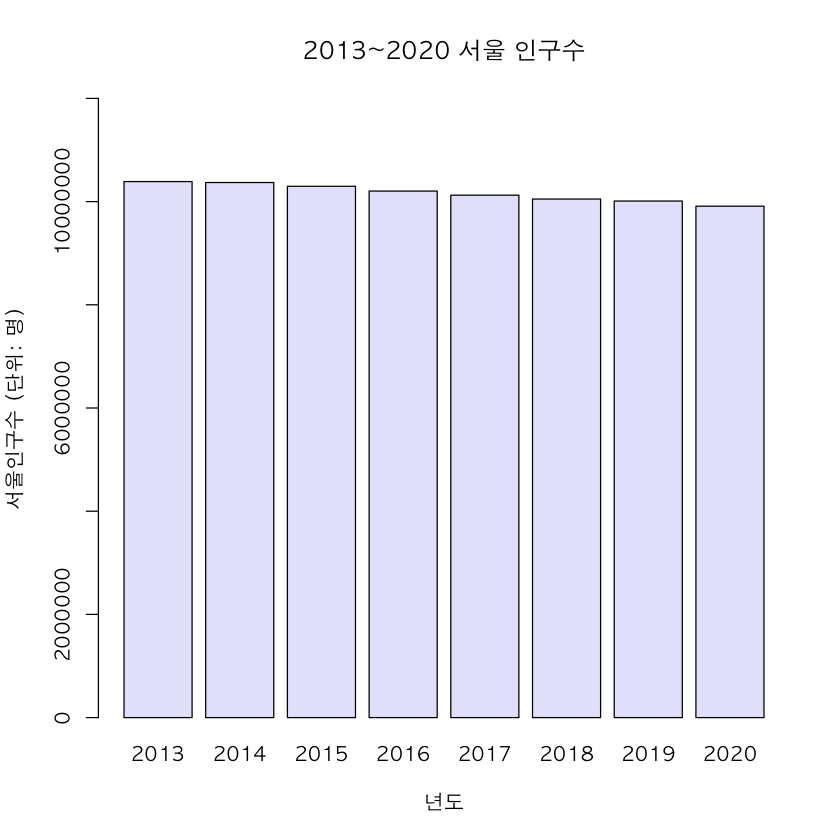

In [45]:
par(family = "AppleGothic")
options(scipen = 100)

barplot(
    popCar$서울인구수,
    type = 'o',
    main = '2013~2020 서울 인구수',
    ylim = c(0, 12000000),
    ylab = c('서울인구수 (단위: 명)'),
    xlab = c('년도'),
    names = popCar$년도,
    col= 'lavender',
    
)

In [46]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

samp <- createDataPartition(sdd2[,1:4]$소요시간범위, p=0.7, list=F)
data.tr <- sdd2[,1:4][samp,]
data.test <- sdd2[,1:4][-samp,]

for (i in 1:100){
   # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위  
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf, "\n")
cat("의사결정나무 : ", sum_ctree, "\n")
cat("SVM :  ", sum_svm, "\n")
cat("다항 로지스틱 :  ", sum_multi, "\n")
cat("인공신경망 :  ", sum_nnet, "\n")
# sum_ctree
cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
cat("의사결정나무 : ", sum_ctree_tr, "\n")
cat("SVM :  ", sum_svm_tr, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
cat("인공신경망 :  ", sum_nnet_tr, "\n")

Test Data 
랜덤 포레스트 :  73.53659 
의사결정나무 :  75.60976 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  86.1068 
의사결정나무 :  81.5534 
SVM :   85.43689 
다항 로지스틱 :   85.43689 
인공신경망 :   82.23301 


In [47]:
# 기본

Test Data 
랜덤 포레스트 :  75.53659 
의사결정나무 :  65.85366 
SVM :   75.60976 
다항 로지스틱 :   75.60976 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  84.87379 
의사결정나무 :  72.81553 
SVM :   80.58252 
다항 로지스틱 :   74.75728 
인공신경망 :   78.73786 

가장 높은 모델 : SVM
=============================

Test Data 
랜덤 포레스트 :  75.2439 
의사결정나무 :  70.73171 
SVM :   75.60976 
다항 로지스틱 :   73.17073 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  85.30097 
의사결정나무 :  71.84466 
SVM :   82.52427 
다항 로지스틱 :   76.69903 
인공신경망 :   76.58252 

가장 높은 모델 : SVM
==============================

Test Data 
랜덤 포레스트 :  73.31707 
의사결정나무 :  70.73171 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  86.99029 
의사결정나무 :  70.87379 
SVM :   83.49515 
다항 로지스틱 :   75.72816 
인공신경망 :   80.40777 

가장 높은 모델 : 다항 로지스틱 78.04878 
==============================

Test Data 
랜덤 포레스트 :  77.82927 
의사결정나무 :  70.73171 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  83.97087 
의사결정나무 :  70.87379 
SVM :   84.46602 
다항 로지스틱 :   77.6699 
인공신경망 :   78.58252 

가장 높은 모델 : 랜덤 포레스트 77.82927 
==============================

Test Data 
랜덤 포레스트 :  74.90244 
의사결정나무 :  68.29268 
SVM :   75.60976 
다항 로지스틱 :   75.60976 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  87.84466 
의사결정나무 :  71.84466 
SVM :   81.5534 
다항 로지스틱 :   76.69903 
인공신경망 :   78.75728 

가장 높은 모델 : SVM 81.5534 
================================

Test Data 
랜덤 포레스트 :  75.29268 
의사결정나무 :  60.97561 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   60.97561 
------------------------ 
Training Data 
랜덤 포레스트 :  85.7767 
의사결정나무 :  73.78641 
SVM :   82.52427 
다항 로지스틱 :   84.46602 
인공신경망 :   81.80583 

가장 높은 모델 : 다항 로지스틱 78.04878 

ERROR: Error in parse(text = x, srcfile = src): <text>:3:6: 예상하지 못한 기호(symbol)입니다.
2: 
3: Test Data
        ^


In [ ]:
# 기본 + 눈비

Test Data 
랜덤 포레스트 :  72.14634 
의사결정나무 :  73.17073 
SVM :   73.17073 
다항 로지스틱 :   78.04878 
인공신경망 :   73.17073 
------------------------ 
Training Data 
랜덤 포레스트 :  86.41748 
의사결정나무 :  82.52427 
SVM :   85.43689 
다항 로지스틱 :   87.37864 
인공신경망 :   82.45631 

가장 높은 모델 : 다항 로지스틱 78.04878 
=============================

Test Data 
랜덤 포레스트 :  85.43902 
의사결정나무 :  70.73171 
SVM :   82.92683 
다항 로지스틱 :   80.4878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  80.81553 
의사결정나무 :  70.87379 
SVM :   78.64078 
다항 로지스틱 :   81.5534 
인공신경망 :   80.53398 

가장 높은 모델 : 랜덤 포레스트 85.43902
=============================

Test Data 
랜덤 포레스트 :  68.4878 
의사결정나무 :  68.29268 
SVM :   73.17073 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  81.52427 
의사결정나무 :  82.52427 
SVM :   83.49515 
다항 로지스틱 :   83.49515 
인공신경망 :   80.27184 

가장 높은 모델 : SVM 73.17073 
=============================

Test Data 
랜덤 포레스트 :  77.7561 
의사결정나무 :  73.17073 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   73.17073 
------------------------ 
Training Data 
랜덤 포레스트 :  83.35922 
의사결정나무 :  84.46602 
SVM :   82.52427 
다항 로지스틱 :   83.49515 
인공신경망 :   81.61165 

가장 높은 모델 : 랜덤 포레스트 77.7561
=============================

Test Data 
랜덤 포레스트 :  78.39024 
의사결정나무 :  78.04878 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   78.04878 
------------------------ 
Training Data 
랜덤 포레스트 :  81.38835 
의사결정나무 :  80.58252 
SVM :   80.58252 
다항 로지스틱 :   82.52427 
인공신경망 :   82.04854 

가장 높은 모델 : 랜덤 포레스트 78.39024

In [ ]:
# for100
# 눈비 + 2종
Test Data 
랜덤 포레스트 :  79.92683 
의사결정나무 :  80.4878 
SVM :   85.36585 
다항 로지스틱 :   78.04878 
인공신경망 :   80.4878 
------------------------ 
Training Data 
랜덤 포레스트 :  99.96117 
의사결정나무 :  79.61165 
SVM :   83.49515 
다항 로지스틱 :   85.43689 
인공신경망 :   25.56311 


==========================

Test Data 
랜덤 포레스트 :  83.90244 
의사결정나무 :  70.73171 
SVM :   78.04878 
다항 로지스틱 :   82.92683 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  100 
의사결정나무 :  71.84466 
SVM :   86.40777 
다항 로지스틱 :   86.40777 
인공신경망 :   25.03883 

==========================

Test Data 
랜덤 포레스트 :  80.36585 
의사결정나무 :  75.60976 
SVM :   80.4878 
다항 로지스틱 :   80.4878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  99.99029 
의사결정나무 :  81.5534 
SVM :   87.37864 
다항 로지스틱 :   86.40777 
인공신경망 :   25.3301 

===========================

Test Data 
랜덤 포레스트 :  80.29268 
의사결정나무 :  65.85366 
SVM :   82.92683 
다항 로지스틱 :   85.36585 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  99.97087 
의사결정나무 :  73.78641 
SVM :   82.52427 
다항 로지스틱 :   86.40777 
인공신경망 :   24.92233 

===========================

Test Data 
랜덤 포레스트 :  75.85366 
의사결정나무 :  80.4878 
SVM :   78.04878 
다항 로지스틱 :   82.92683 
인공신경망 :   80.4878 
------------------------ 
Training Data 
랜덤 포레스트 :  99.96117 
의사결정나무 :  86.40777 
SVM :   85.43689 
다항 로지스틱 :   89.32039 
인공신경망 :   25.07767 

In [ ]:
# 눈비 + 1종

Test Data 
랜덤 포레스트 :  85.04878 
의사결정나무 :  75.60976 
SVM :   75.60976 
다항 로지스틱 :   80.4878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  99.72816 
의사결정나무 :  81.5534 
SVM :   81.5534 
다항 로지스틱 :   88.34951 
인공신경망 :   25.02913 

============================

Test Data 
랜덤 포레스트 :  81.02439 
의사결정나무 :  65.85366 
SVM :   85.36585 
다항 로지스틱 :   82.92683 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  99.93204 
의사결정나무 :  71.84466 
SVM :   79.61165 
다항 로지스틱 :   84.46602 
인공신경망 :   25.43689 

=============================

Test Data 
랜덤 포레스트 :  86.43902 
의사결정나무 :  75.60976 
SVM :   70.73171 
다항 로지스틱 :   80.4878 
인공신경망 :   75.60976 
------------------------ 
Training Data 
랜덤 포레스트 :  99.02913 
의사결정나무 :  81.5534 
SVM :   82.52427 
다항 로지스틱 :   88.34951 
인공신경망 :   25.51456 

==============================

Test Data 
랜덤 포레스트 :  76.73171 
의사결정나무 :  82.92683 
SVM :   78.04878 
다항 로지스틱 :   80.4878 
인공신경망 :   82.92683 
------------------------ 
Training Data 
랜덤 포레스트 :  99.57282 
의사결정나무 :  84.46602 
SVM :   82.52427 
다항 로지스틱 :   86.40777 
인공신경망 :   25.31068 

=============================

Test Data 
랜덤 포레스트 :  79.14634 
의사결정나무 :  78.04878 
SVM :   63.41463 
다항 로지스틱 :   80.4878 
인공신경망 :   78.04878 
------------------------ 
Training Data 
랜덤 포레스트 :  99.07767 
의사결정나무 :  87.37864 
SVM :   84.46602 
다항 로지스틱 :   89.32039 
인공신경망 :   25.17476 

In [ ]:
# 1종

Test Data 
랜덤 포레스트 :  83.73171 
의사결정나무 :  73.17073 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   73.17073 
------------------------ 
Training Data 
랜덤 포레스트 :  94.76699 
의사결정나무 :  69.90291 
SVM :   85.43689 
다항 로지스틱 :   78.64078 
인공신경망 :   24.99029 

===========================

Test Data 
랜덤 포레스트 :  84.53659 
의사결정나무 :  68.29268 
SVM :   80.4878 
다항 로지스틱 :   78.04878 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  93.16505 
의사결정나무 :  71.84466 
SVM :   79.61165 
다항 로지스틱 :   77.6699 
인공신경망 :   25.1068 

==========================

Test Data 
랜덤 포레스트 :  86.97561 
의사결정나무 :  68.29268 
SVM :   80.4878 
다항 로지스틱 :   80.4878 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  94.24272 
의사결정나무 :  69.90291 
SVM :   81.5534 
다항 로지스틱 :   82.52427 
인공신경망 :   25.53398 

===========================

Test Data 
랜덤 포레스트 :  82.87805 
의사결정나무 :  70.73171 
SVM :   85.36585 
다항 로지스틱 :   78.04878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  96.94175 
의사결정나무 :  70.87379 
SVM :   82.52427 
다항 로지스틱 :   79.61165 
인공신경망 :   25.38835 

===========================

Test Data 
랜덤 포레스트 :  75.02439 
의사결정나무 :  68.29268 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  96 
의사결정나무 :  84.46602 
SVM :   86.40777 
다항 로지스틱 :   84.46602 
인공신경망 :   25.42718 

In [ ]:
# 2종

Test Data 
랜덤 포레스트 :  72.36585 
의사결정나무 :  68.29268 
SVM :   73.17073 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  95.34951 
의사결정나무 :  71.84466 
SVM :   82.52427 
다항 로지스틱 :   79.61165 
인공신경망 :   24.82524 

=============================

Test Data 
랜덤 포레스트 :  81.4878 
의사결정나무 :  68.29268 
SVM :   73.17073 
다항 로지스틱 :   68.29268 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  94.93204 
의사결정나무 :  71.84466 
SVM :   82.52427 
다항 로지스틱 :   82.52427 
인공신경망 :   25.65049 

==============================

Test Data 
랜덤 포레스트 :  73.65854 
의사결정나무 :  68.29268 
SVM :   75.60976 
다항 로지스틱 :   70.73171 
인공신경망 :   68.29268 
------------------------ 
Training Data 
랜덤 포레스트 :  96.51456 
의사결정나무 :  71.84466 
SVM :   85.43689 
다항 로지스틱 :   83.49515 
인공신경망 :   25.4466 

==============================

Test Data 
랜덤 포레스트 :  80.09756 
의사결정나무 :  70.73171 
SVM :   82.92683 
다항 로지스틱 :   78.04878 
인공신경망 :   70.73171 
------------------------ 
Training Data 
랜덤 포레스트 :  96.79612 
의사결정나무 :  70.87379 
SVM :   82.52427 
다항 로지스틱 :   81.5534 
인공신경망 :   25.26214 

===============================

Test Data 
랜덤 포레스트 :  71.09756 
의사결정나무 :  65.85366 
SVM :   75.60976 
다항 로지스틱 :   78.04878 
인공신경망 :   65.85366 
------------------------ 
Training Data 
랜덤 포레스트 :  96.6699 
의사결정나무 :  70.87379 
SVM :   84.46602 
다항 로지스틱 :   79.61165 
인공신경망 :   24.69903 

In [48]:
sdd22 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd22 <- subset(sdd22, 소요시간 <= 220 & !(출발시간 == 0 & 소요시간 == 97))
table(sdd22$소요시간범위)


 A  B  C  D 
35 36 36 28 

In [49]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

samp <- createDataPartition(sdd22[,c(1:3,7)]$소요시간범위, p=0.7, list=F)
data.tr <- sdd22[,c(1:3,7)][samp,]
data.test <- sdd22[,c(1:3,7)][-samp,]

for (i in 1:100){
   # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위  
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf, "\n")
cat("의사결정나무 : ", sum_ctree, "\n")
cat("SVM :  ", sum_svm, "\n")
cat("다항 로지스틱 :  ", sum_multi, "\n")
cat("인공신경망 :  ", sum_nnet, "\n")

cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
cat("의사결정나무 : ", sum_ctree_tr, "\n")
cat("SVM :  ", sum_svm_tr, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
cat("인공신경망 :  ", sum_nnet_tr, "\n")

Test Data 
랜덤 포레스트 :  68.5 
의사결정나무 :  68.42105 
SVM :   76.31579 
다항 로지스틱 :   68.42105 
인공신경망 :   68.42105 
------------------------ 
Training Data 
랜덤 포레스트 :  94.70103 
의사결정나무 :  83.50515 
SVM :   83.50515 
다항 로지스틱 :   84.53608 
인공신경망 :   26.93814 


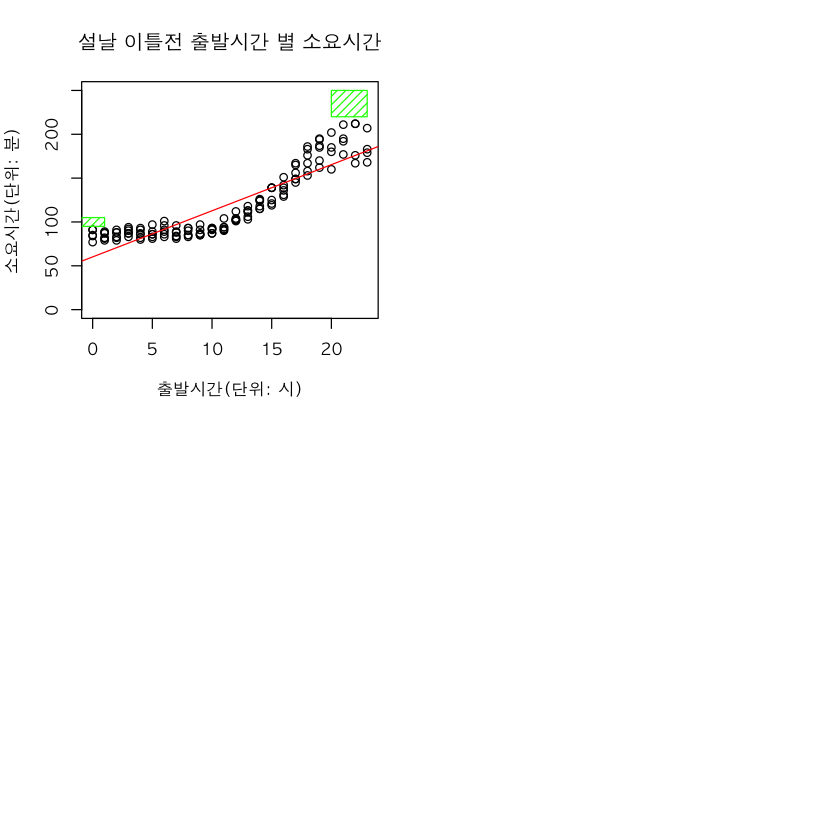

In [50]:
par(bg = 'white' , family = 'AppleGothic' , mfrow = c(2,2))
plot( 
    sdd22$출발시간, sdd22$소요시간 ,
    ylim=c(0,250),
    main = '설날 이틀전 출발시간 별 소요시간',
    xlab = '출발시간(단위: 시)',
    ylab = '소요시간(단위: 분)'
)
r <- lm(sdd22$소요시간 ~ sdd22$출발시간) # 수식 , W = Y, H = X
abline(r, col='red')
rect(20,220,23,250,col="green",border="green",density=20)
rect(-1,95,1,105,col="green",border="green",density=20)

#plot( day1$출발시간, sdd22$소요시간)
#r <- lm(day1$소요시간 ~ day1$출발시간) # 수식 , W = Y, H = X
#abline(r, col='red')

#plot( dday$출발시간, dday$소요시간)
#r <- lm(dday$소요시간 ~ dday$출발시간) # 수식 , W = Y, H = X
#abline(r, col='red')

In [53]:
sdd222 <- sdd22[,c(2:3,5:9)]

samp <- createDataPartition(sdd222$소요시간, p=0.7, list=F)
data.tr <- sdd222[samp,]
data.test <- sdd222[-samp,]

In [52]:
# training
model_tr <- lm(소요시간 ~ ., data=data.tr)
model_tr

# test
model_test <- lm(소요시간 ~ ., data=data.test)
model_test


Call:
lm(formula = 소요시간 ~ ., data = data.tr)

Coefficients:
    (Intercept)         출발시간         연휴길이         눈비TRUE  
-124.9576785124     5.0552834140    -0.5405475897     1.9187342901  
    X1종.교통량      X2종.교통량       서울인구수  
   0.0000004065    -0.0000261129     0.0000199605  



Call:
lm(formula = 소요시간 ~ ., data = data.test)

Coefficients:
    (Intercept)         출발시간         연휴길이         눈비TRUE  
-735.6033122847     5.2604085547    -4.6943858875    -3.9416775253  
    X1종.교통량      X2종.교통량       서울인구수  
   0.0000007843    -0.0000342453     0.0000810720  


In [ ]:
cor(sdd222)

In [ ]:
reduced_tr <- step(model_tr, direction = "backward")
reduced_test <- step(model_test, direction = "backward")

In [ ]:
reduced_tr
reduced_test

In [ ]:
summary(reduced_tr)

In [ ]:
summary(reduced_test)

In [ ]:
samp <- createDataPartition(sdd222$출발시간, p=0.7, list=F)
data.tr <- sdd222[samp,]
data.test <- sdd222[-samp,]

x <- subset(data.test, select = -소요시간)
y <- data.test$소요시간

x.tr <- subset(data.tr, select = -소요시간)
y.tr <- data.tr$소요시간

model <- lm(소요시간 ~ . , data = data.tr)
model <- step(model, direction = 'backward')

pred <- predict(model, x)
pred.tr <- predict(model, x.tr)


In [ ]:
summary(model)

# 진짜 머신러닝

In [376]:
sdd22 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
sdd22 <- subset(sdd22, 소요시간 <= 220 & !(출발시간 == 0 & 소요시간 == 97))
nrow(sdd22)
table(sdd22$소요시간범위)

[1] 135


 A  B  C  D 
35 36 36 28 

In [377]:


sdd22 <- sdd22[,-4]
head(sdd22)

소요시간범위,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
B,0,3,TRUE,3793419,229419,10388055,91
B,1,3,TRUE,2514790,203047,10388055,88
B,2,3,TRUE,1846564,235137,10388055,88
A,3,3,TRUE,1632415,305994,10388055,87
B,4,3,TRUE,2247045,444384,10388055,91
B,5,3,TRUE,5186824,774325,10388055,97


In [378]:
# 다중 회귀
model <- lm(소요시간 ~ ., data = sdd22[,-1])       # 전체 컬럼으로 모델 생성, 소요시간범위,날짜 컬럼은 제거해야함@
reduced <- step(model, direction = "backward")   # 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
summary(reduced)                                        # 얘가 알려주는 컬럼으로 분석하면 된다


Start:  AIC=708.04
소요시간 ~ 출발시간 + 연휴길이 + 눈비 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
- 눈비         1         4  23074 706.06
- 연휴길이     1       184  23254 707.11
<none>                      23070 708.04
- X1종.교통량  1      1515  24585 714.63
- 서울인구수   1      2661  25731 720.77
- X2종.교통량  1     10301  33371 755.87
- 출발시간     1    119331 142401 951.75

Step:  AIC=706.06
소요시간 ~ 출발시간 + 연휴길이 + X1종.교통량 + 
    X2종.교통량 + 서울인구수

              Df Sum of Sq    RSS    AIC
- 연휴길이     1       281  23355 705.69
<none>                      23074 706.06
- X1종.교통량  1      1512  24585 712.63
- 서울인구수   1      2743  25817 719.23
- X2종.교통량  1     10373  33446 754.18
- 출발시간     1    119368 142442 949.79

Step:  AIC=705.69
소요시간 ~ 출발시간 + X1종.교통량 + X2종.교통량 + 
    서울인구수

              Df Sum of Sq    RSS    AIC
<none>                      23355 705.69
- X1종.교통량  1      1535  24890 712.29
- 서울인구수   1      3122  26477 720.63
- X2종.교통량  1     10316  33670 753.08
- 출발시간     1    120417 


Call:
lm(formula = 소요시간 ~ 출발시간 + X1종.교통량 + 
    X2종.교통량 + 서울인구수, data = sdd22[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-27.812  -8.507  -1.409   8.735  26.505 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -295.7972648266   88.5699667097  -3.340              0.00109 ** 
출발시간       5.1242125100    0.1979238524  25.890 < 0.0000000000000002 ***
X1종.교통량    0.0000004903    0.0000001677   2.923              0.00409 ** 
X2종.교통량   -0.0000284931    0.0000037602  -7.578     0.00000000000585 ***
서울인구수     0.0000364797    0.0000087507   4.169     0.00005552664500 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 130 degrees of freedom
Multiple R-squared:  0.8865,	Adjusted R-squared:  0.883 
F-statistic: 253.8 on 4 and 130 DF,  p-value: < 0.00000000000000022


In [379]:
day2amL <- sdd22[,c(1:2,5:8)]                     # 원 데이터 day1am에서 reduced가 알려준 컬럼만 추리기
head(day2amL)

소요시간범위,출발시간,X1종.교통량,X2종.교통량,서울인구수,소요시간
B,0,3793419,229419,10388055,91
B,1,2514790,203047,10388055,88
B,2,1846564,235137,10388055,88
A,3,1632415,305994,10388055,87
B,4,2247045,444384,10388055,91
B,5,5186824,774325,10388055,97


In [380]:
#---

# 학습시키고 예측하기
samp <- createDataPartition(day2amL$소요시간범위, p=0.7, list=F) # 컬럼 추린 데이터로 샘플링
data.tr <- day2amL[samp,]
data.tr<-data.tr[,-1]
head(data.tr)
data.test <- day2amL[-samp,]
data.test<-data.test[,-1]
head(data.test)

,출발시간,X1종.교통량,X2종.교통량,서울인구수,소요시간
1,0,3793419,229419,10388055,91
4,3,1632415,305994,10388055,87
5,4,2247045,444384,10388055,91
6,5,5186824,774325,10388055,97
9,8,17462577,1624836,10388055,90
10,9,19314963,1932103,10388055,91


,출발시간,X1종.교통량,X2종.교통량,서울인구수,소요시간
2,1,2514790,203047,10388055,88
3,2,1846564,235137,10388055,88
7,6,10866409,1206051,10388055,96
8,7,15984740,1349972,10388055,89
19,18,21219880,899265,10388055,167
20,19,16408481,655917,10388055,185


In [381]:


# 모델만들기
model_tr <- lm(소요시간 ~ . , data = data.tr) # 추린 컬럼으로 만든 학습용 모델

# 트레이닝 데이터 훈련
x_tr <- subset(data.tr, select = -소요시간)
y_tr <- data.tr$소요시간
    
# 테스트 데이터 훈련  
x_test <- subset(data.test, select = -소요시간)
y_test <- data.test$소요시간

# 문제 맞추기
predicted <- predict(model_tr, x_test) # 정답 예측
correct <- y_test # 정답

cbind(predicted ,  y_test) # 예측값과 정답 한번에 보기

summary(model_tr) # 학습용 모델의 정확도와 평균 표준 오차 확인

,predicted,y_test
2,83.99711,88
3,87.94721,88
7,85.69439,96
8,89.38207,89
19,162.01561,167
20,171.70586,185
24,198.92205,183
30,91.81825,81
31,88.20053,83
33,91.08020,85



Call:
lm(formula = 소요시간 ~ ., data = data.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.443  -8.889  -1.194   9.077  26.312 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -297.7423134074  103.3371384418  -2.881             0.004928 ** 
출발시간       5.1987938623    0.2220873189  23.409 < 0.0000000000000002 ***
X1종.교통량    0.0000005039    0.0000001947   2.588             0.011211 *  
X2종.교통량   -0.0000284196    0.0000043313  -6.561        0.00000000308 ***
서울인구수     0.0000366810    0.0000102037   3.595             0.000524 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.31 on 92 degrees of freedom
Multiple R-squared:  0.8952,	Adjusted R-squared:  0.8906 
F-statistic: 196.4 on 4 and 92 DF,  p-value: < 0.00000000000000022


In [382]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

# samp <- createDataPartition(day2amL$소요시간, p=0.7, list=F)
# data.tr <- day2amL[samp,]
# data.test <- day2amL[-samp,]

for (i in 1:100){
#    # 트레이닝 데이터 훈련
#   x_tr <- subset(data.tr, select = -소요시간)
#   y_tr <- data.tr$소요시간
    
#   # 테스트 데이터 훈련  
#   x_test <- subset(data.test, select = -소요시간)
#   y_test <- data.test$소요시간 
    
  # RF
  model_rf <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- 1 - (sum((y_test - pred_rf)^2) / sum((y_test - mean(y_test))^2))
  # RF train
  model_rf_tr <- randomForest(소요시간 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- 1 - (sum((y_tr - pred_rf_tr)^2) / sum((y_tr - mean(y_tr))^2))
  
#   인공신경망
#   model_nnet <- nnet(소요시간 ~ ., data=data.tr, size=3, trace=FALSE)
#   pred_nnet <- predict(model_nnet, x_test, type="class")
#   예측력_nnet <- mean(pred_nnet == y_test)
#   인공신경망 train
#   model_nnet_tr <- nnet(소요시간 ~ ., data=data.tr, size=3, trace=FALSE)
#   pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
#   예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- 1 - (sum((y_test - pred_ctree)^2) / sum((y_test - mean(y_test))^2))
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- 1 - (sum((y_tr - pred_ctree_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
  # SVM test
  model_svm <- svm(소요시간 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "raw")
  예측력_svm <- 1 - (sum((y_test - pred_svm)^2) / sum((y_test - mean(y_test))^2))
  # SVM train
   model_svm_tr <- svm(소요시간 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "raw")
   예측력_svm_tr <- 1 - (sum((y_tr - pred_svm_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
#   # 다항 로지스틱 회귀분석
#    model_multinom <- multinom(소요시간 ~ ., data=data.tr, trace=FALSE)
#    pred_multinom <- predict(model_multinom, x_test, type="class")
#    예측력_multinom <- 1 - (sum((y_test - pred_multinom)^2) / sum((y_test - mean(y_test))^2))
#   # 다항 로지스틱 회귀분석 train
#     model_multinom_tr <- multinom(소요시간 ~ ., data=data.tr, trace=FALSE)
#     pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
#     예측력_multinom_tr <- 1 - (sum((y_tr - pred_multinom_tr)^2) / sum((y_tr - mean(y_tr))^2))
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf, "\n")
cat("의사결정나무 : ", sum_ctree, "\n")
cat("SVM :  ", sum_svm, "\n")
# cat("다항 로지스틱 :  ", sum_multi, "\n")
# cat("인공신경망 :  ", sum_nnet, "\n")

cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
cat("의사결정나무 : ", sum_ctree_tr, "\n")
cat("SVM :  ", sum_svm_tr, "\n")
# cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
# cat("인공신경망 :  ", sum_nnet_tr, "\n")

In [383]:
sd2222 <- read.csv("../Data_Project/AI프로젝트 - D-2-2.csv")
nrow(sd2222)

[1] 144

In [ ]:
par(bg = 'white' , family = 'AppleGothic' , mfrow = c(2,2))
plot( 
    sd2222$출발시간, sd2222$소요시간 ,
    ylim=c(0,260),
    main = '설날 이틀전 출발시간 별 소요시간',
    xlab = '출발시간 (단위: 시)',
    ylab = '소요시간 (단위: 분)'
)
r <- lm(sdd22$소요시간 ~ sdd22$출발시간) # 수식 , W = Y, H = X
abline(r, col='red')
rect(20,220,23,250,col="green",border="green",density=20)
rect(-1,95,1,105,col="green",border="green",density=20)

In [69]:
day2amL_2 <- day2amL[,-1]

In [76]:
model_tr_2 <- lm(소요시간 ~ . , data = day2amL_2)
summary(model_tr_2)


Call:
lm(formula = 소요시간 ~ ., data = day2amL_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.812  -8.507  -1.409   8.735  26.505 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -295.7972648266   88.5699667097  -3.340              0.00109 ** 
출발시간       5.1242125100    0.1979238524  25.890 < 0.0000000000000002 ***
X1종.교통량    0.0000004903    0.0000001677   2.923              0.00409 ** 
X2종.교통량   -0.0000284931    0.0000037602  -7.578     0.00000000000585 ***
서울인구수     0.0000364797    0.0000087507   4.169     0.00005552664500 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 130 degrees of freedom
Multiple R-squared:  0.8865,	Adjusted R-squared:  0.883 
F-statistic: 253.8 on 4 and 130 DF,  p-value: < 0.00000000000000022


In [ ]:
# (Intercept) -395.7083801834
# 출발시간 4.9917180987
# 1종교통량 0.0000005890
# 2종교통량 -0.0000299079
# 서울인구수 0.0000462839

# Residual standard error : 12.2
# Multiple R-squared: 0.8985

In [ ]:
-395.7083801834*

In [12]:
d2 <- read.csv("../Data_Project/d2d2.csv")
head(d2)

날짜,분,출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
2013-02-08,1,0,3,TRUE,3793419,229419,10388055,92
2013-02-08,2,0,3,TRUE,3793419,229419,10388055,91
2013-02-08,3,0,3,TRUE,3793419,229419,10388055,80
2013-02-08,4,0,3,TRUE,3793419,229419,10388055,0
2013-02-08,5,0,3,TRUE,3793419,229419,10388055,90
2013-02-08,6,0,3,TRUE,3793419,229419,10388055,91


In [13]:
library(caret)
# for data manipulation
library(tidyverse)

In [5]:
summary(d2)

         날짜           분           출발시간        연휴길이    눈비        
 2013-02-08:288   Min.   : 1.00   Min.   : 0.00   Min.   :3   Mode :logical  
 2014-01-29:288   1st Qu.: 3.75   1st Qu.: 5.75   1st Qu.:4   FALSE:1164     
 2015-02-17:288   Median : 6.50   Median :11.50   Median :4   TRUE :564      
 2017-01-26:288   Mean   : 6.50   Mean   :11.50   Mean   :4                  
 2018-02-14:288   3rd Qu.: 9.25   3rd Qu.:17.25   3rd Qu.:4                  
 2020-01-23:288   Max.   :12.00   Max.   :23.00   Max.   :5                  
  X1종.교통량        X2종.교통량        서울인구수          소요시간     
 Min.   : 1010519   Min.   :  46739   Min.   : 9911088   Min.   :   0.0  
 1st Qu.: 5038416   1st Qu.: 239452   1st Qu.:10049607   1st Qu.:  89.0  
 Median :13313528   Median : 538258   Median :10210858   Median : 101.0  
 Mean   :15364195   Mean   : 729697   Mean   :10190010   Mean   : 127.5  
 3rd Qu.:19536346   3rd Qu.:1206854   3rd Qu.:10369593   3rd Qu.: 160.0  
 Max.   :63006617   Max.   :2208959   Ma

In [ ]:
# 이상치 : (0 , 75, 500 이상 )분 제거

In [14]:
dim(d2)
d2 <- d2[,-(1:2)]
head(d2)

[1] 1728    9

출발시간,연휴길이,눈비,X1종.교통량,X2종.교통량,서울인구수,소요시간
0,3,TRUE,3793419,229419,10388055,92
0,3,TRUE,3793419,229419,10388055,91
0,3,TRUE,3793419,229419,10388055,80
0,3,TRUE,3793419,229419,10388055,0
0,3,TRUE,3793419,229419,10388055,90
0,3,TRUE,3793419,229419,10388055,91


In [8]:
samp = createDataPartition(d2$소요시간, p = 0.7, list = F)

samp <- createDataPartition(d2$소요시간, p=0.7, list=F)
data.tr <- d2[samp,]
data.test <- d2[-samp,]


# 트레이닝 데이터 훈련
x_tr <- subset(data.tr, select = -소요시간)
y_tr <- data.tr$소요시간범위

# 테스트 데이터 훈련  
x_test <- subset(data.test, select = -소요시간)
y_test <- data.test$소요시간  

In [15]:
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)
control_rf <- rfeControl(functions = rfFuncs, method = "repeatedcv", repeats = 5, number = 10)

In [16]:
result = rfe(x = d2[,-7],
            y = d2[,7],
           
            rfeControl = control_rf
            )

result


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD MAESD Selected
         4 76.51   0.4412 14.45  99.04     0.3004 7.899        *
         6 77.20   0.4383 12.97  99.04     0.3031 7.804         

The top 4 variables (out of 4):
   출발시간, 서울인구수, X2종.교통량, X1종.교통량


In [ ]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_multi <- 0
sum_svm <- 0

sum_rf_tr <- 0
sum_ctree_tr <- 0
sum_svm_tr <- 0
sum_multi_tr <- 0
sum_nnet_tr <- 0

samp <- createDataPartition(sdd22[,c(1:3,7)]$소요시간범위, p=0.7, list=F)
data.tr <- sdd22[,c(1:3,7)][samp,]
data.test <- sdd22[,c(1:3,7)][-samp,]

for (i in 1:100){
   # 트레이닝 데이터 훈련
  x_tr <- subset(data.tr, select = -소요시간범위)
  y_tr <- data.tr$소요시간범위
    
  # 테스트 데이터 훈련  
  x_test <- subset(data.test, select = -소요시간범위)
  y_test <- data.test$소요시간범위  
    
  # RF
  model_rf <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf <- predict(model_rf, x_test)
  예측력_rf <- mean(pred_rf == y_test)
  # RF train
  model_rf_tr <- randomForest(소요시간범위 ~ . , data = data.tr, ntree = 100)
  pred_rf_tr <- predict(model_rf_tr, x_tr)
  예측력_rf_tr <- mean(pred_rf_tr == y_tr)
  
  # 인공신경망
  model_nnet <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet <- predict(model_nnet, x_test, type="class")
  예측력_nnet <- mean(pred_nnet == y_test)
  # 인공신경망 train
  model_nnet_tr <- nnet(소요시간범위 ~ ., data=data.tr, size=3, trace=FALSE)
  pred_nnet_tr <- predict(model_nnet_tr, x_tr, type="class")
  예측력_nnet_tr <- mean(pred_nnet_tr == y_tr)
 
  # 의사결정나무
  model_ctree <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree <- predict(model_ctree, x_test)
  예측력_nnet <- mean(pred_ctree == y_test)
  # 의사결정나무 train
  model_ctree_tr <- ctree(소요시간범위 ~ ., data=data.tr)
  pred_ctree_tr <- predict(model_ctree_tr, x_tr)
  예측력_ctree_tr <- mean(pred_ctree_tr == y_tr)
    
  # SVM test
  model_svm <- svm(소요시간범위 ~ ., data=data.tr)
  pred_svm <- predict(model_svm, x_test, type = "class")
  예측력_svm <- mean(pred_svm == y_test)
  # SVM train
   model_svm_tr <- svm(소요시간범위 ~ ., data=data.tr)
   pred_svm_tr <- predict(model_svm_tr, x_tr, type = "class")
   예측력_svm_tr <- mean(pred_svm_tr == y_tr)
    
  # 다항 로지스틱 회귀분석
   model_multinom <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
   pred_multinom <- predict(model_multinom, x_test, type="class")
   예측력_multinom <- mean(pred_multinom == y_test)
  # 다항 로지스틱 회귀분석 train
    model_multinom_tr <- multinom(소요시간범위 ~ ., data=data.tr, trace=FALSE)
    pred_multinom_tr <- predict(model_multinom_tr, x_tr, type="class")
    예측력_multinom_tr <- mean(pred_multinom_tr == y_tr)
    
  sum_rf <- sum_rf + 예측력_rf
  sum_ctree <- sum_ctree + 예측력_nnet
  sum_svm <- sum_svm + 예측력_svm
  sum_multi <- sum_multi + 예측력_multinom
  sum_nnet <- sum_nnet + 예측력_nnet
    
  sum_svm_tr <- sum_svm_tr + 예측력_svm_tr
  sum_rf_tr <- sum_rf_tr + 예측력_rf_tr
  sum_ctree_tr <- sum_ctree_tr + 예측력_ctree_tr
  sum_multi_tr <- sum_multi_tr + 예측력_multinom_tr
  sum_nnet_tr <- sum_nnet_tr + 예측력_nnet_tr
}
cat("Test Data \n")
cat("랜덤 포레스트 : ", sum_rf, "\n")
cat("의사결정나무 : ", sum_ctree, "\n")
cat("SVM :  ", sum_svm, "\n")
cat("다항 로지스틱 :  ", sum_multi, "\n")
cat("인공신경망 :  ", sum_nnet, "\n")

cat("------------------------", "\n")
cat("Training Data \n")
cat("랜덤 포레스트 : ", sum_rf_tr, "\n")
cat("의사결정나무 : ", sum_ctree_tr, "\n")
cat("SVM :  ", sum_svm_tr, "\n")
cat("다항 로지스틱 :  ", sum_multi_tr, "\n")
cat("인공신경망 :  ", sum_nnet_tr, "\n")